<a href="https://colab.research.google.com/github/Naveenrajkumar1389/Statistics/blob/main/AllClassificationAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicting categorical data using classification algorithms

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [ ]:
df=pd.read_csv("/content/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.groupby('HeartDisease').count()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
HeartDisease,,,,,,,,,,,
0,410,410,410,410,410,410,410,410,410,410,410
1,508,508,508,508,508,508,508,508,508,508,508


In [ ]:
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [ ]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [ ]:
def label_encoder(y):
  le=LabelEncoder()
  df[y]=le.fit_transform(df[y])
label_list=["Sex","ChestPainType","RestingECG","ExerciseAngina","Oldpeak","ST_Slope"]

for l in label_list:
    label_encoder(l)

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,10,2,0
1,49,0,2,160,180,0,1,156,0,20,1,1
2,37,1,1,130,283,0,2,98,0,10,2,0
3,48,0,0,138,214,0,1,108,1,25,1,1
4,54,1,2,150,195,0,1,122,0,10,2,0


In [ ]:
X=df.drop(["HeartDisease"],axis=1)
y=df['HeartDisease']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)
print("y train shape before reshaping:",y_train.shape)
y_train=y_train.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)

print("X train shape:",X_train.shape)
print("X test shape:",X_test.shape)
print("y train shape:",y_train.shape)
print("y test shape:",y_test.shape)

y train shape before reshaping: (734,)
X train shape: (734, 11)
X test shape: (184, 11)
y train shape: (734, 1)
y test shape: (184, 1)


In [ ]:
#6.Standardize the data
#Feature Scaling
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)


In [ ]:
#7.Implement Classification models
#To store results of models, we create two dictionaries

result_dict_train = {}
result_dict_test= {}


In [ ]:
#Logistic Regression

reg=LogisticRegression(random_state=42)
accuracies=cross_val_score(reg,X_train,y_train,cv=5) #k fold cross validation
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

#obtain accuracy

print("Train score:",np.mean(accuracies))
print("Test score:",reg.score(X_test,y_test))


Train score: 0.851486347963843
Test score: 0.8532608695652174


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [ ]:
#store results in dictionaries


result_dict_train['Logistic Train Score']=np.mean(accuracies)
result_dict_test['Logistic Test Score']=reg.score(X_test,y_test)

In [ ]:
#KNN classifier
knn=KNeighborsClassifier()
accuracies=cross_val_score(knn,X_train,y_train,cv=5) #k fold cross validation
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

#obtain accuracy

print("Train score:",np.mean(accuracies))
print("Test score:",knn.score(X_test,y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Train score: 0.8596775696580001
Test score: 0.8478260869565217


In [ ]:
result_dict_train['KNN Train Score']=np.mean(accuracies)
result_dict_test['KNN Test Score']=knn.score(X_test,y_test)

In [ ]:
#SVM classifier
svm=SVC(random_state=42)
accuracies=cross_val_score(svm,X_train,y_train,cv=5) #k fold cross validation
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)

#obtain accuracy

print("Train score:",np.mean(accuracies))
print("Test score:",svm.score(X_test,y_test))

Train score: 0.867831516168111
Test score: 0.875


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [ ]:
result_dict_train['SVM Train Score']=np.mean(accuracies)
result_dict_test['SVM Test Score']=svm.score(X_test,y_test)

In [ ]:
#Decison tree classifier
dtc=DecisionTreeClassifier(random_state=42)
accuracies=cross_val_score(dtc,X_train,y_train,cv=5) #k fold cross validation
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)

#obtain accuracy

print("Train score:",np.mean(accuracies))
print("Test score:",dtc.score(X_test,y_test))

Train score: 0.7752399589972975
Test score: 0.8043478260869565


In [ ]:
result_dict_train['Decision Tree Train Score']=np.mean(accuracies)
result_dict_test['Decision Tree Test Score']=dtc.score(X_test,y_test)

In [ ]:
#Random Forest classifier
rfc=RandomForestClassifier(random_state=42)
accuracies=cross_val_score(rfc,X_train,y_train,cv=5) #k fold cross validation
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)

#obtain accuracy

print("Train score:",np.mean(accuracies))
print("Test score:",rfc.score(X_test,y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Train score: 0.8692013791818096
Test score: 0.8858695652173914


In [ ]:
result_dict_train['Random Forest Train Score']=np.mean(accuracies)
result_dict_test['Random Forest Test Score']=rfc.score(X_test,y_test)

In [ ]:
#Naive Bayes classifier
gnb=GaussianNB()
accuracies=cross_val_score(gnb,X_train,y_train,cv=5) #k fold cross validation
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)

#obtain accuracy

print("Train score:",np.mean(accuracies))
print("Test score:",gnb.score(X_test,y_test))

Train score: 0.8610287950796757
Test score: 0.842391304347826


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [ ]:
result_dict_train['Naive Bayes Train Score']=np.mean(accuracies)
result_dict_test['Naive Bayes Test Score']=gnb.score(X_test,y_test)

In [ ]:
#8.Compare Accuracy Scores
df_result_train= pd.DataFrame.from_dict(result_dict_train,orient='index',columns=["Score"])
df_result_train

,Score
LogisticRegression,0.851486
Logistic Train Score,0.859678
KNN Train Score,0.859678
SVM Train Score,0.867832
Decision Tree Train Score,0.775240
Random Forest Train Score,0.869201
Naive Bayes Train Score,0.861029


In [ ]:
#Compare Accuracy Scores
df_result_test= pd.DataFrame.from_dict(result_dict_test,orient='index',columns=["Score"])
df_result_test

,Score
LogisticRegression,0.853261
Logistic Test Score,0.853261
KNN Test Score,0.847826
SVM Test Score,0.875000
Decision Tree Test Score,0.804348
Random Forest Test Score,0.885870
Naive Bayes Test Score,0.842391


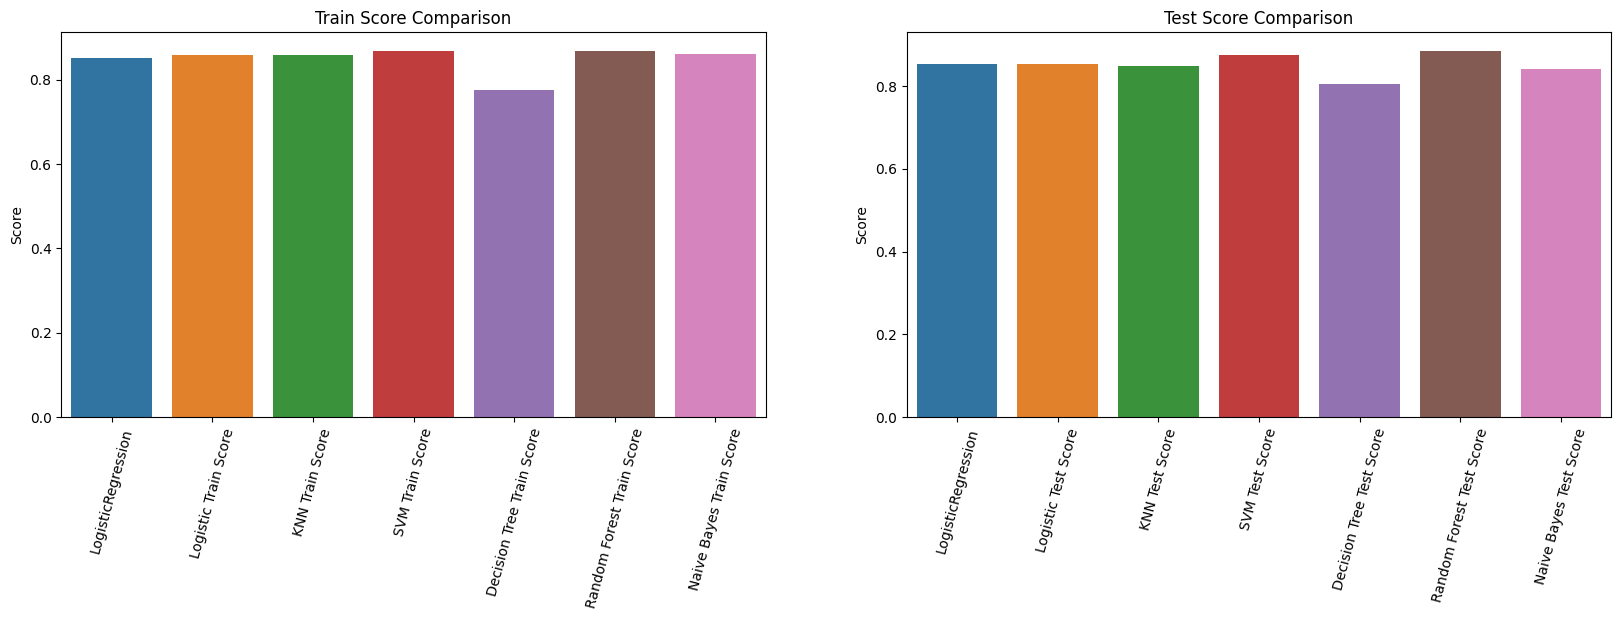

In [ ]:
import seaborn as sns

fig,ax=plt.subplots(1,2,figsize=(20,5))
sns.barplot(x=df_result_train.index,y=df_result_train.Score,ax=ax[0])
sns.barplot(x=df_result_test.index,y=df_result_test.Score,ax=ax[1])

ax[0].set_xticklabels(df_result_train.index,rotation=75)
ax[0].set(title="Train Score Comparison")
ax[1].set_xticklabels(df_result_test.index,rotation=75)
ax[1].set(title="Test Score Comparison")
plt.show()